# Dentistry Equipament Analysis

### Introduction

### Import Packages

In [1]:
using DataFrames
using Gadfly

### Load Data

In [6]:
df = readtable("equipament_list.csv");

### Exploratory Data Analysis

In [7]:
showcols(df)

152x5 DataFrames.DataFrame
| Col # | Name      | Eltype     | Missing |
|-------|-----------|------------|---------|
| 1     | Product   | UTF8String | 0       |
| 2     | Qtd       | Int64      | 0       |
| 3     | UnitPrice | Float64    | 0       |
| 4     | Total     | Float64    | 0       |
| 5     | x         | Int64      | 152     |

### Eliminated Products

Products with 0 quantity were removed from the list.

In [17]:
eliminated_products = df[df[:Qtd] .== 0, :Product]
print(eliminated_products)

UTF8String["Corte de fio pesado","139 (Bird Beak)","Corte de amarrilho (Quinelato)","Saca banda","Corte distal (Quinelato)","Espátula para cimento","Espelho","Peça de mão","Caneta de alta rotação","Lamparina á álcool","Placa de vidro","Espátula para cera nº 7","Espátula Lecron","Caneta para retro projetor","Disco de caborundum","Pote dappen","Pincel Tigre nº 0","Conjunto de moldeiras (16)","Máquina fotográfica","Aparelho fotopolimerizador","Avental branco para laboratório","Toalha de rosto","Plático comum para forrar bancada","Fio dental","1 rolo de filme de PVC","01 caixa de protetor para seringa tríplice","Tiras de lixas para amálgamas","Material de desinfecção de instrumental","Cola superbonder","Fio de aço .014","Fio de aço .016","Fio de aço .018","Fio para amarrilho 0,30mm (1 rolo)","Borracha macia para lápis","Lapiseira de 0,5 mm","Transferidor 180 (Desetec)","Régua transparente","Papel sulfite 17,5 x 17,5 cm (Chamex) (100)","Fita adesiva (durex)"]

In [20]:
df = df[df[:Qtd] .> 0, :];

In [101]:
size(df)

(113,5)

### Quantity Products Distribution

#### Overall

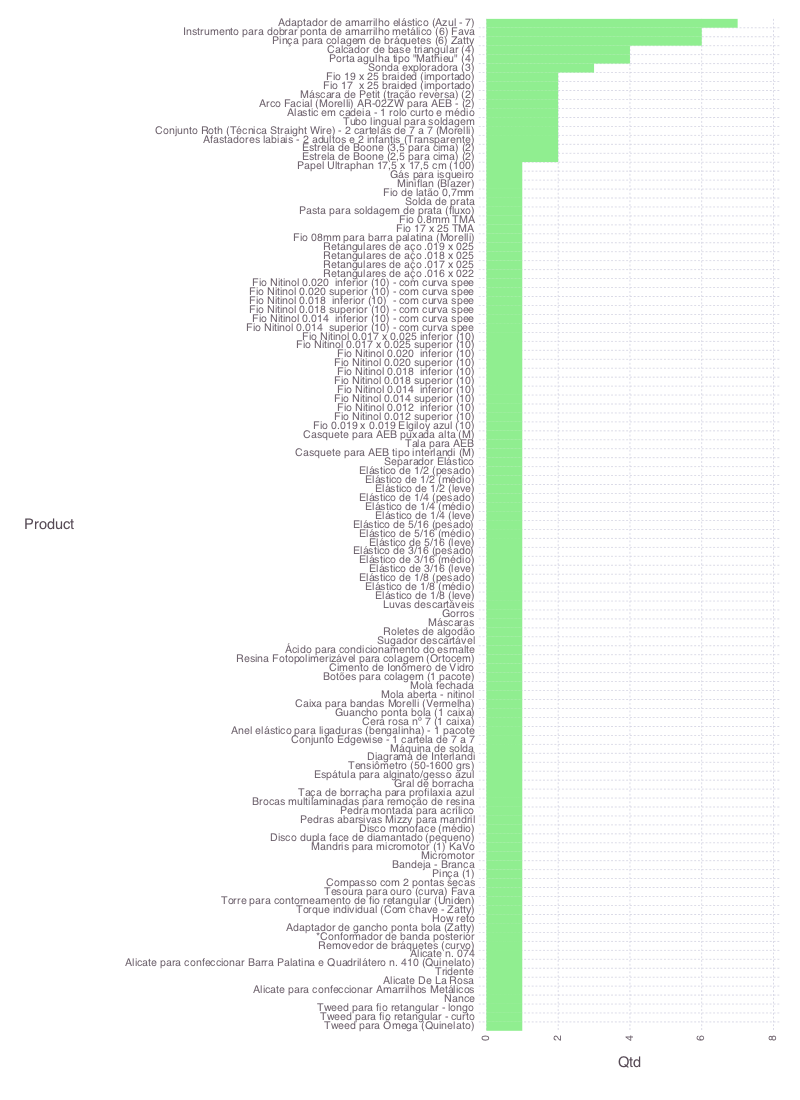

In [74]:
set_default_plot_size(800px, 1100px)
levels = Array{AbstractString}(sort(df, cols=[:Qtd])[:Product])
plot(df, x=:Qtd, y=:Product, 
Scale.y_discrete(levels=levels), Geom.bar(orientation=:horizontal),
                 Theme(default_color=colorant"lightgreen"))

#### Unique Products

In [44]:
for (i, p) in enumerate(df[df[:Qtd] .== 1, :Product])
    println("$i. $p") 
end

1. Tweed para Ômega (Quinelato)
2. Tweed para fio retangular - curto
3. Tweed para fio retangular - longo
4. Nance
5. Alicate para confeccionar Amarrilhos Metálicos
6. Alicate De La Rosa
7. Tridente
8. Alicate para confeccionar Barra Palatina e Quadrilátero n. 410 (Quinelato)
9. Alicate n. 074
10. Removedor de bráquetes (curvo)
11. *Conformador de banda posterior
12. Adaptador de gancho ponta bola (Zatty)
13. How reto
14. Torque individual (Com chave - Zatty)
15. Torre para contorneamento de fio retangular (Uniden)
16. Tesoura para ouro (curva) Fava
17. Compasso com 2 pontas secas
18. Pinça (1)
19. Bandeja - Branca
20. Micromotor
21. Mandris para micromotor (1) KaVo
22. Disco dupla face de diamantado (pequeno)
23. Disco monoface (médio)
24. Pedras abarsivas Mizzy para mandril
25. Pedra montada para acrílico
26. Brocas multilaminadas para remoção de resina
27. Taça de borraçha para profilaxia azul
28. Gral de borracha
29. Espátula para alginato/gesso azul
30. Tensiômetro (50-1600 grs)
3

#### Recorrent Products

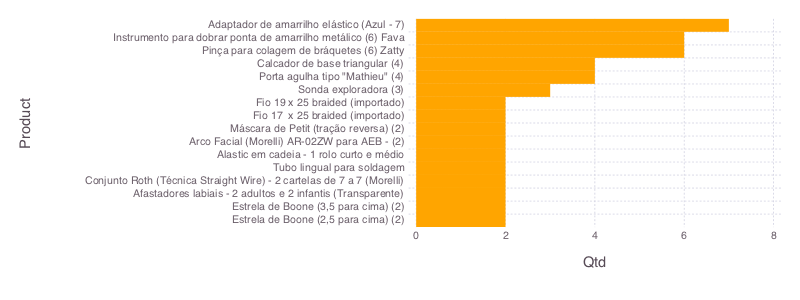

In [75]:
set_default_plot_size(800px, 300px)
levels = Array{AbstractString}(sort(df, cols=[:Qtd])[:Product])
plot(df[df[:Qtd] .> 1, :], x=:Qtd, y=:Product,
     Scale.y_discrete(levels=levels), 
     Geom.bar(orientation=:horizontal), Theme(default_color=colorant"orange"))

### Price Products Distribution

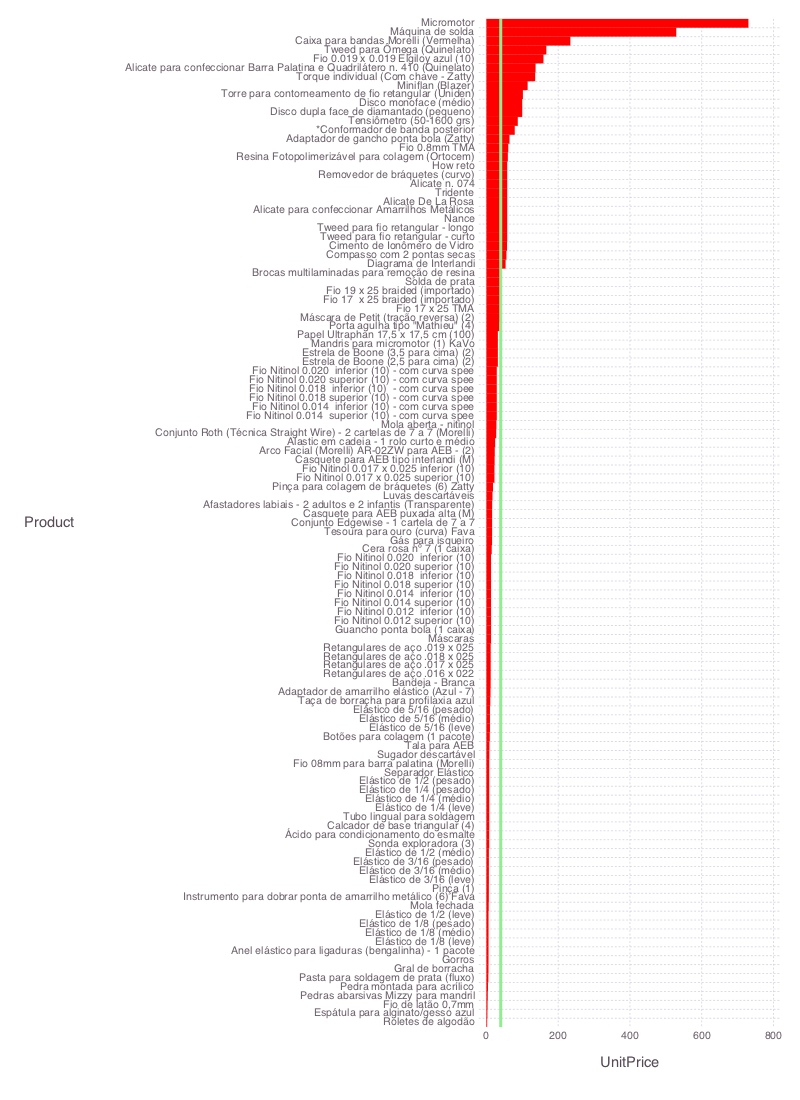

In [97]:
set_default_plot_size(800px, 1100px)
levels = Array{AbstractString}(sort(df, cols=[:UnitPrice])[:Product])
plot(df, 
layer(xintercept=[40], Geom.vline, Theme(default_color=colorant"lightgreen", line_width=3px)),
     layer(x=:UnitPrice, y=:Product, Geom.bar(orientation=:horizontal)),
     Scale.y_discrete(levels=levels),
     Theme(default_color=colorant"red"))

### Items more expensives

In [100]:
sum(df[df[:UnitPrice] .> 40, :UnitPrice])

3714.1600000000003

In [105]:
sort(df, cols=[:UnitPrice], rev=true)[1:10, [:Product, :UnitPrice]]

,Product,UnitPrice
1,Micromotor,730.0
2,Máquina de solda,529.0
3,Caixa para bandas Morelli (Vermelha),234.0
4,Tweed para Ômega (Quinelato),167.1
5,Fio 0.019 x 0.019 Elgiloy azul (10),159.0
6,Alicate para confeccionar Barra Palatina e Quadrilátero n. 410 (Quinelato),137.0
7,Torque individual (Com chave - Zatty),136.0
8,Miniflan (Blazer),114.9
9,Torre para contorneamento de fio retangular (Uniden),101.75
10,Disco dupla face de diamantado (pequeno),99.9


In [112]:
top_10_values = sum(sort(df, cols=[:UnitPrice], rev=true)[1:10, :UnitPrice])
total_value = df[:Qtd]' * df[:UnitPrice]
print("Top 10: $top_10_values ($(round(top_10_values/total_value[1]*100, 2))%)")

Top 10: 2408.65 (43.61%)